# Application 3: évaluation d’impact avec variable instrumentale

Cette application consiste à évaluer l’impact de la connaissance du statut HIV sur l’achat de préservatifs à travers la mise en œuvre de l’approche par des variables instrumentales. Les données proviennent de l’article de Rebecca Thornton “The Demand and Impact of Learning HIV Status” (American Economic Review, 2008). 



Répondre à cette question à partir de données d’observation pose problème dans la mesure où les individus qui ont connaissance de leur statut HIV sont ceux qui ont fait la démarche d’aller passer un test de dépistage du VIH. Dès lors, on peut s’attendre à ce qu’ils aient des caractéristiques différentes de ceux qui n’ont pas entrepris cette démarche et, en particulier, un comportement sexuel différent. On peut imaginer par exemple que ceux qui ont fait le test de dépistage ont en moyenne un comportement sexuel plus risqué. Cet effet de sélection est susceptible de biaiser les résultats. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
import statsmodels.api as sm

Importation des données

In [2]:
data = pd.read_excel('D:/ENS Paris Saclay/Evaluation de Politique/Application/IV.xlsx')
data

,got,any,age,male,educ2004,hadsex12,eversex,tb,land2004,bought,hiv2004
0,1,1,41,0,6,1,1,0,0,0,0
1,0,1,30,0,0,1,1,0,1,0,0
2,0,1,36,0,7,1,1,1,1,0,0
3,1,1,41,0,8,0,1,1,1,0,0
4,0,0,20,1,12,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1294,0,1,36,0,4,0,1,1,1,0,1
1295,0,0,36,1,0,1,1,0,1,0,1
1296,1,1,35,1,0,1,1,0,1,0,1
1297,0,1,42,0,0,1,1,0,1,0,1


Première partie - Statistiques descriptives 

Q1.Présentez les statistiques descriptives de la variable de résultat (bought). Présentez les statistiques descriptives des variables âge, genre, éducation, activité sexuelle, etc. Commentez vos résultats.

In [3]:
data.describe()

,got,any,age,male,educ2004,hadsex12,eversex,tb,land2004,bought,hiv2004
count,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000
mean,0.726713,0.789838,36.166282,0.432640,3.564280,0.756736,0.979215,0.210931,0.757506,0.084681,0.050038
std,0.445819,0.407580,13.935635,0.495633,3.798404,0.429218,0.142720,0.408127,0.428757,0.278513,0.218108
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,24.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,35.000000,0.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,46.000000,1.000000,7.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,80.000000,1.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Q2.Présentez séparément ces statistiques pour le groupe de traitement (got=1) et le groupe de contrôle (got=0). Pour chaque variable, faites un test statistique pour évaluer s’il existe des différences significatives (au seuil de 5%) entre les groupes de traitement et de contrôle. Commentez vos résultats. En particulier, si vous trouvez des différences significatives, indiquez en quoi est-ce que cela peut affecter les résultats de l’évaluation d’impact. 

In [4]:
x = data['got']
x = sm.add_constant(x)

In [5]:
var = ['bought','male','age','educ2004','hadsex12','eversex','tb','land2004','hiv2004']

In [6]:
result = sm.OLS(data['age'],x).fit()

In [7]:
for i in var: 
    result = sm.OLS(data[i],x).fit()
    print('Test de différence en:', i)
    print(result.summary())

Test de différence en: bought
                            OLS Regression Results                            
Dep. Variable:                 bought   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.1876
Date:                Wed, 27 Mar 2024   Prob (F-statistic):              0.665
Time:                        00:59:12   Log-Likelihood:                -182.11
No. Observations:                1299   AIC:                             368.2
Df Residuals:                    1297   BIC:                             378.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0901 

II.	Deuxième partie - Analyse graphique 

1. Faites un histogramme, où figure en abscisses les catégories « traitement » et « contrôle », et en ordonnées le 
pourcentage des individus de chacun de ces groupes qui est allé chercher ses résultats après l’intervention. 
Commentez vos résultats. 

In [8]:
result = sm.OLS(data['bought'],x).fit()

In [9]:
res = pd.read_html(result.summary().tables[1].as_html(),header=0,index_col=0)[0]
res

,coef,std err,t,P>|t|,[0.025,0.975]
const,0.0901,0.015,6.096,0.000,0.061,0.119
got,-0.0075,0.017,-0.433,0.665,-0.042,0.027


In [10]:
res['coef'].values[1],res['coef'].values[0]

(-0.0075, 0.0901)

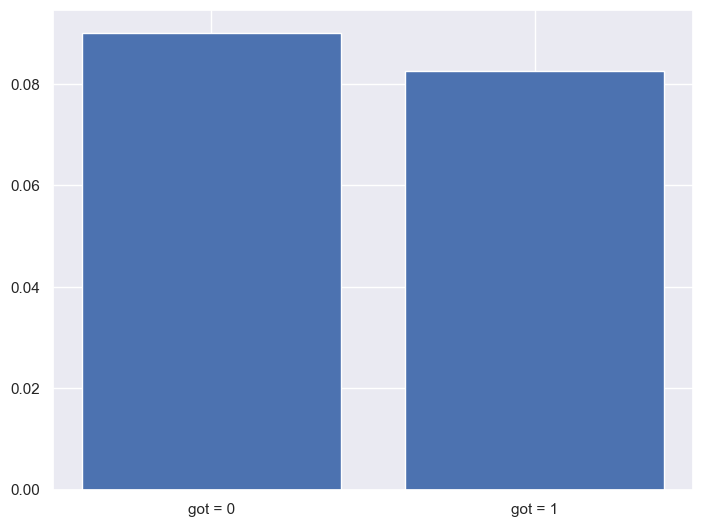

In [11]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
xaxis = ['got = 0', 'got = 1']
yaxis = [res['coef'].values[0],res['coef'].values[0]+res['coef'].values[1]]
ax.bar(xaxis,yaxis)
plt.show()

In [12]:
xaxis, yaxis

(['got = 0', 'got = 1'], [0.0901, 0.0826])

Q2.Refaites le même graphique, mais en séparant l’échantillon selon le statut sérologique. Commentez vos résultats. 

Séropositif

In [13]:
result = sm.OLS(data[data['hiv2004']==1]['bought'],x[data['hiv2004']==1]).fit()
res = pd.read_html(result.summary().tables[1].as_html(),header=0,index_col=0)[0]
res

,coef,std err,t,P>|t|,[0.025,0.975]
const,0.0455,0.066,0.684,0.496,-0.087,0.178
got,0.0941,0.082,1.152,0.254,-0.069,0.257


In [14]:
res['coef'].values[1],res['coef'].values[0]

(0.0941, 0.0455)

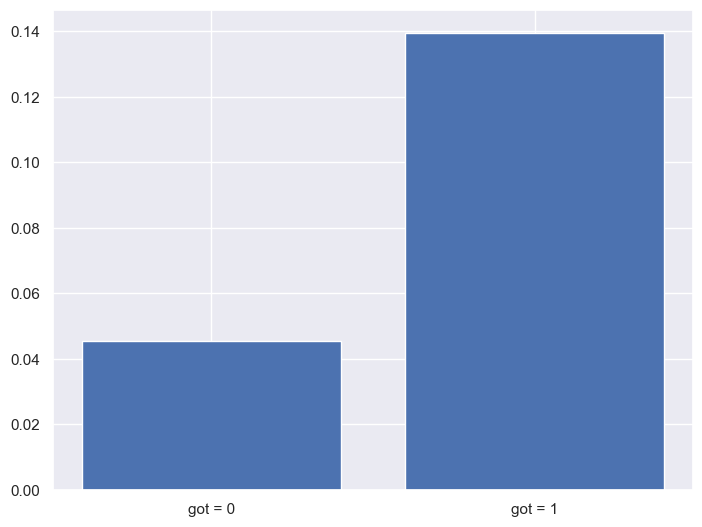

In [15]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
xaxis = ['got = 0', 'got = 1']
yaxis = [res['coef'].values[0],res['coef'].values[0]+res['coef'].values[1]]
ax.bar(xaxis,yaxis)
plt.show()

Séronégatif

In [16]:
result = sm.OLS(data[data['hiv2004']==0]['bought'],x[data['hiv2004']==0]).fit()
res = pd.read_html(result.summary().tables[1].as_html(),header=0,index_col=0)[0]
res

,coef,std err,t,P>|t|,[0.025,0.975]
const,0.0931,0.015,6.138,0.000,0.063,0.123
got,-0.0132,0.018,-0.743,0.458,-0.048,0.022


In [17]:
res['coef'].values[1],res['coef'].values[0]

(-0.0132, 0.0931)

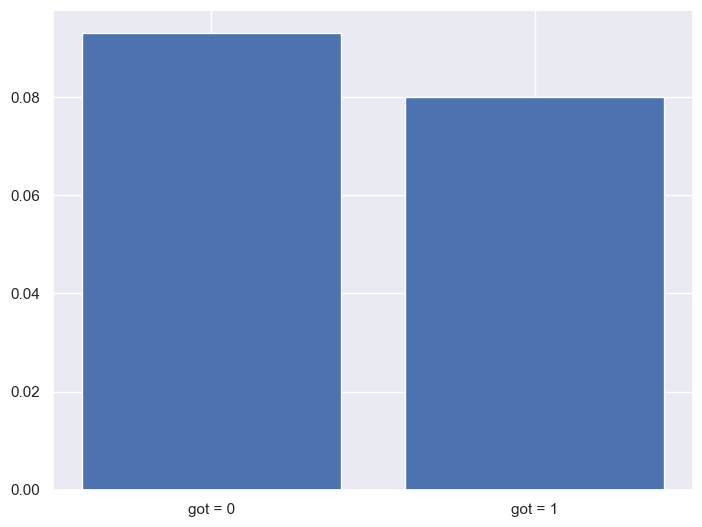

In [18]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
xaxis = ['got = 0', 'got = 1']
yaxis = [res['coef'].values[0],res['coef'].values[0]+res['coef'].values[1]]
ax.bar(xaxis,yaxis)
plt.show()

Troisième partie : Analyse MCO 

1.Faites une première estimation de l’effet de connaître son statut sérologique (variable got) sur la probabilité d’avoir acheté des préservatifs (variable bought). Commentez vos résultats du point de vue de la significativité statistique mais également de l’interprétation du niveau du coefficient. 

In [19]:
result = sm.OLS(data['bought'],x).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 bought   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.1876
Date:                Wed, 27 Mar 2024   Prob (F-statistic):              0.665
Time:                        00:59:12   Log-Likelihood:                -182.11
No. Observations:                1299   AIC:                             368.2
Df Residuals:                    1297   BIC:                             378.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0901      0.015      6.096      0.0

In [20]:
x = data[['got','age','male','educ2004','eversex','tb','land2004']]
x = sm.add_constant(x)

In [21]:
result = sm.OLS(data['bought'],x).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 bought   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     12.45
Date:                Wed, 27 Mar 2024   Prob (F-statistic):           1.65e-15
Time:                        00:59:12   Log-Likelihood:                -139.76
No. Observations:                1299   AIC:                             295.5
Df Residuals:                    1291   BIC:                             336.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0050      0.060     -0.083      0.9

Quatrième partie : Analyse d’impact VI

1.	Première étape : Faites une estimation de l’effet d’avoir obtenu une incitation monétaire (variable any) sur la probabilité d’être allé chercher ses résultats (variable got). Commentez vos résultats du point de vue de la significativité statistique mais également de l’interprétation du niveau du coefficient. Calculer la variable prédite (got_hat) par cette équation de première étape. 

In [22]:
x = data[['any','age','male','educ2004','eversex','tb','land2004']]
x = sm.add_constant(x)
y = data['got']

In [23]:
result = sm.OLS(y,x).fit()

In [24]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    got   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     39.47
Date:                Wed, 27 Mar 2024   Prob (F-statistic):           1.81e-50
Time:                        00:59:12   Log-Likelihood:                -667.34
No. Observations:                1299   AIC:                             1351.
Df Residuals:                    1291   BIC:                             1392.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3144      0.092      3.427      0.0

In [25]:
data['got_hat'] = result.predict(x)
data

,got,any,age,male,educ2004,hadsex12,eversex,tb,land2004,bought,hiv2004,got_hat
0,1,1,41,0,6,1,1,0,0,0,0,0.838636
1,0,1,30,0,0,1,1,0,1,0,0,0.838507
2,0,1,36,0,7,1,1,1,1,0,0,0.772119
3,1,1,41,0,8,0,1,1,1,0,0,0.776259
4,0,0,20,1,12,1,1,0,0,0,0,0.321423
...,...,...,...,...,...,...,...,...,...,...,...,...
1294,0,1,36,0,4,0,1,1,1,0,1,0.786734
1295,0,0,36,1,0,1,1,0,1,0,1,0.399182
1296,1,1,35,1,0,1,1,0,1,0,1,0.832922
1297,0,1,42,0,0,1,1,0,1,0,1,0.860134


Q2. Deuxième étape : Faites une estimation de l’effet de la variable prédite d’obtenir une incitation monétaire (variable got_hat) sur la probabilité d’avoir acheté des préservatifs (variable bought). Commentez vos résultats du point de vue de la significativité statistique mais également de l’interprétation du niveau du coefficient.

In [26]:
x = data[['got_hat','age','male','educ2004','eversex','tb','land2004']]
x = sm.add_constant(x)
y = data['bought']

In [27]:
result = sm.OLS(y,x).fit()

In [28]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 bought   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     12.46
Date:                Wed, 27 Mar 2024   Prob (F-statistic):           1.63e-15
Time:                        00:59:12   Log-Likelihood:                -139.75
No. Observations:                1299   AIC:                             295.5
Df Residuals:                    1291   BIC:                             336.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.066      0.002      0.9

Cinquième partie : Hétérogénéité de l’impact 

1.	Y a-t-il un effet différent entre les hommes et les femmes ? Estimez la relation entre le fait de connaître son statut sérologique et le fait d’avoir acheté des préservatifs pour les 2 groupes. Commentez vos résultats. 

Séronégatif

In [29]:
seronegatif = data[data['hiv2004']==0]
x = seronegatif[['any','age','male','educ2004','eversex','tb','land2004']]
x = sm.add_constant(x)
y =seronegatif['got']
result = sm.OLS(y,x).fit()
print(result.summary())
seronegatif['got_hat'] = result.predict(x)


x = seronegatif[['got_hat','age','male','educ2004','eversex','tb','land2004']]
x = sm.add_constant(x)
y = seronegatif['bought']
result = sm.OLS(y,x).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    got   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     38.57
Date:                Wed, 27 Mar 2024   Prob (F-statistic):           4.13e-49
Time:                        00:59:12   Log-Likelihood:                -625.93
No. Observations:                1234   AIC:                             1268.
Df Residuals:                    1226   BIC:                             1309.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3148      0.092      3.423      0.0

C:\Users\Yao Thibaut Kpegli\AppData\Local\Temp\ipykernel_28368\3050533985.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seronegatif['got_hat'] = result.predict(x)


Séropositif

In [30]:
seropositif = data[data['hiv2004']==1]
x = seropositif[['any','age','male','educ2004','eversex','tb','land2004']]
x = sm.add_constant(x)
y =seropositif['got']
result = sm.OLS(y,x).fit()
print(result.summary())
seropositif['got_hat'] = result.predict(x)


x = seropositif[['got_hat','age','male','educ2004','eversex','tb','land2004']]
x = sm.add_constant(x)
y = seropositif['bought']
result = sm.OLS(y,x).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    got   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1.602
Date:                Wed, 27 Mar 2024   Prob (F-statistic):              0.163
Time:                        00:59:12   Log-Likelihood:                -38.610
No. Observations:                  65   AIC:                             91.22
Df Residuals:                      58   BIC:                             106.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
any            0.4155      0.141      2.942      0.0

C:\Users\Yao Thibaut Kpegli\AppData\Local\Temp\ipykernel_28368\3951407138.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seropositif['got_hat'] = result.predict(x)
